# Task 1: Data Retrieval and Parsing

Retrieving and plotting Gamma Ray Spectrometer(GRS) data. The data is collected for a duration of 18 months at an interval of 32 seconds from 1998 to 1999 at an altitude of ~30km and ~100km.

In [2]:
# Importing libraries to download required data
import urllib.request
import time
import struct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Retrieving the corresponding .dat and .lbl file

Before parsing through the .dat files which hold the correspoding GRS data, the files are downloaded from the following url https://pds-geosciences.wustl.edu/lunar/lp-l-grs-3-rdr-v1/lp_2xxx/grs/ using the **urllib.request** module within Python. The files are stored locally, following the naming convention **{year}_{day}_grs.dat** and **{year}_{day}_grs.lbl**

The datasets for the years 1998 and 1999 have been downloaded separately inorder to minimize the overhead.


In [ ]:
# Downloading GRS data from the specified URL for the year 1998

url = 'https://pds-geosciences.wustl.edu/lunar/lp-l-grs-3-rdr-v1/lp_2xxx/grs/'

start = time.time()
data_not_found = 0
label_not_found = 0

for year in range(1998, 1999):
    for day in range(1, 367):
        if day < 100:
            if day < 10:
                temp_day = "00" + str(day)
            else:
                temp_day = "0" + str(day)
            data_file_name = f'{year}_{temp_day}_grs.dat'
            label_file_name = f'{year}_{temp_day}_grs.lbl'
        else:
            data_file_name = f'{year}_{day}_grs.dat'
            label_file_name = f'{year}_{day}_grs.lbl'
        url_data = url + data_file_name
        url_label = url + label_file_name
        try:
            urllib.request.urlretrieve(url_data, data_file_name)
        except:
            print(f"Data file for {data_file_name} could not be retrieved.")
            data_not_found += 1 
        try:
            urllib.request.urlretrieve(url_label, label_file_name)
        except:
            print(f"Label file for {label_file_name} could not be retrieved.")
            label_not_found += 1

end = time.time()

print("Total time taken to retrive all data and label files: {:.4f} seconds".format(end-start))
print(f"Total .dat files not found {data_not_found}")
print(f"Total .lbl files not found {label_not_found}")

In [ ]:
# Downloading GRS data from the specified URL for the year 1999

url = 'https://pds-geosciences.wustl.edu/lunar/lp-l-grs-3-rdr-v1/lp_2xxx/grs/'

start = time.time()
data_not_found = 0
label_not_found = 0

for year in range(1999, 2000):
    for day in range(1, 367):
        if day < 100:
            if day < 10:
                temp_day = "00" + str(day)
            else:
                temp_day = "0" + str(day)
            data_file_name = f'{year}_{temp_day}_grs.dat'
            label_file_name = f'{year}_{temp_day}_grs.lbl'
        else:
            data_file_name = f'{year}_{day}_grs.dat'
            label_file_name = f'{year}_{day}_grs.lbl'
        url_data = url + data_file_name
        url_label = url + label_file_name
        try:
            urllib.request.urlretrieve(url_data, data_file_name)
        except:
            print(f"Data file for {data_file_name} could not be retrieved.")
            data_not_found += 1 
        try:
            urllib.request.urlretrieve(url_label, label_file_name)
        except:
            print(f"Label file for {label_file_name} could not be retrieved.")
            label_not_found += 1

end = time.time()

print("Total time taken to retrive all data and label files: {:.4f} seconds".format(end-start))
print(f"Total .dat files not found {data_not_found}")
print(f"Total .lbl files not found {label_not_found}")

# Parsing .dat files

The .dat files are parsed in accordance with the instructions and format specified in the respective .lbl file. To illustrate, we first parse the **1998_270_grs.dat** file which denotes the GRS data collected on Day 270 of 1998 by the Lunar Prospector. After parsing through the .dat file, a **Pandas Dataframe** is created which is used to plot and perform further calculations. 

In [3]:
filename = "./Task1/1998_270_grs.lbl"
datafilename = "./Task1/1998_270_grs.dat"

# Define the record format for the label file
label_format = [
    ("PDS_VERSION_ID", "23s"),
    ("RECORD_TYPE", "23s"),
    ("RECORD_BYTES", "23s"),
    ("FILE_RECORDS", "23s"),
    ("^TABLE", "23s"),
    ("DATA_SET_NAME", "59s"),
    ("DATA_SET_ID", "33s"),
    ("PRODUCT_ID", "23s"),
    ("PRODUCT_TYPE", "23s"),
    ("PRODUCT_VERSION_ID", "23s"),
    ("SPACECRAFT_NAME", "23s"),
    ("INSTRUMENT_NAME", "23s"),
    ("TARGET_NAME", "23s"),
    ("START_TIME", "23s"),
    ("STOP_TIME", "23s"),
    ("SPACECRAFT_CLOCK_START_COUNT", "23s"),
    ("SPACECRAFT_CLOCK_STOP_COUNT", "23s"),
    ("PRODUCT_CREATION_TIME", "23s")
]

# Define the record format for the data file
data_format = [
    ("accepted_spectrum", "512f"),
    ("rejected_spectrum", "512f"),
    ("deadtime", "f"),
    ("overload", "f"),
    ("grs_temperature", "f"),
    ("earth_received_time", "f"),
    ("spacecraft_altitude", "f"),
    ("subspacecraft_latitude", "f"),
    ("subspacecraft_longitude", "f")
]

# Open the data file for reading
with open(filename, "r") as f:
    label = {}
    for line in f:
        # Ignoring all comments in the .lbl file.
        if line.strip() and not line.startswith("#"):
            # Splitting lines and reading values for corresponding labels
            parts = line.split("=", 1)
            if len(parts) == 2:
                key = parts[0].strip()
                value = parts[1].strip()
                label[key] = value

# Read the data file
with open(datafilename, "rb") as f:
    # Parse each data record in the file
    data = []
    for i in range(int(label["FILE_RECORDS"])):
        record = {}
        for field, format in data_format:
            bytes = f.read(struct.calcsize(format))
            value = struct.unpack(format, bytes)[0]
            # Separate condition for accepted and rejected spectrum as they 512 data items.
            if field == "accepted_spectrum" or field == "rejected_spectrum":
                value = struct.unpack(format, bytes)
            record[field] = value
        data.append(record)
        
data_size = len(data)

# Print some information from the label and data
print("Data Set Name:", label["DATA_SET_NAME"])
print("Product ID:", label["PRODUCT_ID"])
print("Start Time:", label["START_TIME"])
print("Stop Time:", label["STOP_TIME"])
print("Number of Records:", len(data))

df = pd.DataFrame(data)
df.to_csv("./Task1/1998_270_grs.csv", index = False)
df

Data Set Name: "LP MOON GAMMA RAY SPECTROMETER 3 RDR V1.0"
Product ID: "1998_270_GRS"
Start Time: 1998-270T00:00:00
Stop Time: 1998-270T23:59:59
Number of Records: 2434


,accepted_spectrum,rejected_spectrum,deadtime,overload,grs_temperature,earth_received_time,spacecraft_altitude,subspacecraft_latitude,subspacecraft_longitude
0,"(64.02674102783203, 13.172483444213867, 7.3601...","(64.02674102783203, 13.172483444213867, 7.3601...",0.036275,19240.0,-29.462872,270.000458,94.548889,-65.034149,295.419830
1,"(71.24832153320312, 16.329853057861328, 6.2006...","(71.24832153320312, 16.329853057861328, 6.2006...",0.036379,19470.0,-29.462872,270.000824,94.397430,-66.671982,295.401123
2,"(75.33775329589844, 14.223711013793945, 2.8263...","(75.33775329589844, 14.223711013793945, 2.8263...",0.036232,19333.0,-29.462872,270.001190,94.250351,-68.310600,295.380676
3,"(66.99480438232422, 13.69210147857666, 2.24435...","(66.99480438232422, 13.69210147857666, 2.24435...",0.035954,19481.0,-29.244972,270.001556,94.106232,-69.948906,295.357666
4,"(83.07652282714844, 18.389801025390625, 8.6971...","(83.07652282714844, 18.389801025390625, 8.6971...",0.036298,19235.0,-29.027073,270.001953,93.965805,-71.588005,295.331635
...,...,...,...,...,...,...,...,...,...
2429,"(75.26776885986328, 13.090079307556152, 6.5458...","(75.26776885986328, 13.090079307556152, 6.5458...",0.038344,20041.0,-29.027073,270.998230,90.229843,-39.729458,102.430252
2430,"(75.17789459228516, 12.126038551330566, 2.8355...","(75.17789459228516, 12.126038551330566, 2.8355...",0.038190,19712.0,-29.027073,270.998596,90.314163,-38.083675,102.428497
2431,"(79.4575424194336, 14.664920806884766, 3.31126...","(79.4575424194336, 14.664920806884766, 3.31126...",0.038392,19890.0,-29.027073,270.998993,90.410225,-36.437691,102.426430
2432,"(67.12801361083984, 14.736181259155273, 4.6537...","(67.12801361083984, 14.736181259155273, 4.6537...",0.038206,19701.0,-29.027073,270.999359,90.507782,-34.792377,102.424416


# Visualising the data of 1998_270_grs.dat file

The column sum_accepted_spectrum has been added.

In [4]:
# Finding the sum of all accepted_spectrums, and inserting an additional column in the dataframe.

data = pd.read_csv("./Task1/1998_270_grs.csv")
sum_accepted_spectrum = []
for i in range(data_size):
    temp = data["accepted_spectrum"][i].lstrip("(").rstrip(")").split(",")
    temp = [float(j.strip()) for j in temp]
    sum_accepted_spectrum.append(sum(temp))
data["sum_accepted_spectrum"] = sum_accepted_spectrum
data

,accepted_spectrum,rejected_spectrum,deadtime,overload,grs_temperature,earth_received_time,spacecraft_altitude,subspacecraft_latitude,subspacecraft_longitude,sum_accepted_spectrum
0,"(64.02674102783203, 13.172483444213867, 7.3601...","(64.02674102783203, 13.172483444213867, 7.3601...",0.036275,19240.0,-29.462872,270.000458,94.548889,-65.034149,295.419830,6074.974433
1,"(71.24832153320312, 16.329853057861328, 6.2006...","(71.24832153320312, 16.329853057861328, 6.2006...",0.036379,19470.0,-29.462872,270.000824,94.397430,-66.671982,295.401123,6075.573095
2,"(75.33775329589844, 14.223711013793945, 2.8263...","(75.33775329589844, 14.223711013793945, 2.8263...",0.036232,19333.0,-29.462872,270.001190,94.250351,-68.310600,295.380676,6052.851871
3,"(66.99480438232422, 13.69210147857666, 2.24435...","(66.99480438232422, 13.69210147857666, 2.24435...",0.035954,19481.0,-29.244972,270.001556,94.106232,-69.948906,295.357666,6072.908957
4,"(83.07652282714844, 18.389801025390625, 8.6971...","(83.07652282714844, 18.389801025390625, 8.6971...",0.036298,19235.0,-29.027073,270.001953,93.965805,-71.588005,295.331635,6096.219631
...,...,...,...,...,...,...,...,...,...,...
2429,"(75.26776885986328, 13.090079307556152, 6.5458...","(75.26776885986328, 13.090079307556152, 6.5458...",0.038344,20041.0,-29.027073,270.998230,90.229843,-39.729458,102.430252,6018.951817
2430,"(75.17789459228516, 12.126038551330566, 2.8355...","(75.17789459228516, 12.126038551330566, 2.8355...",0.038190,19712.0,-29.027073,270.998596,90.314163,-38.083675,102.428497,6106.401102
2431,"(79.4575424194336, 14.664920806884766, 3.31126...","(79.4575424194336, 14.664920806884766, 3.31126...",0.038392,19890.0,-29.027073,270.998993,90.410225,-36.437691,102.426430,6097.409543
2432,"(67.12801361083984, 14.736181259155273, 4.6537...","(67.12801361083984, 14.736181259155273, 4.6537...",0.038206,19701.0,-29.027073,270.999359,90.507782,-34.792377,102.424416,6083.288411


[[0.45497323]
 [0.45532941]
 [0.44181099]
 ...
 [0.46832142]
 [0.45991979]
 [0.45269049]]
5310.273548566736
6991.033723437693


Text(0.5, 0, 'Row Number/32 second point')

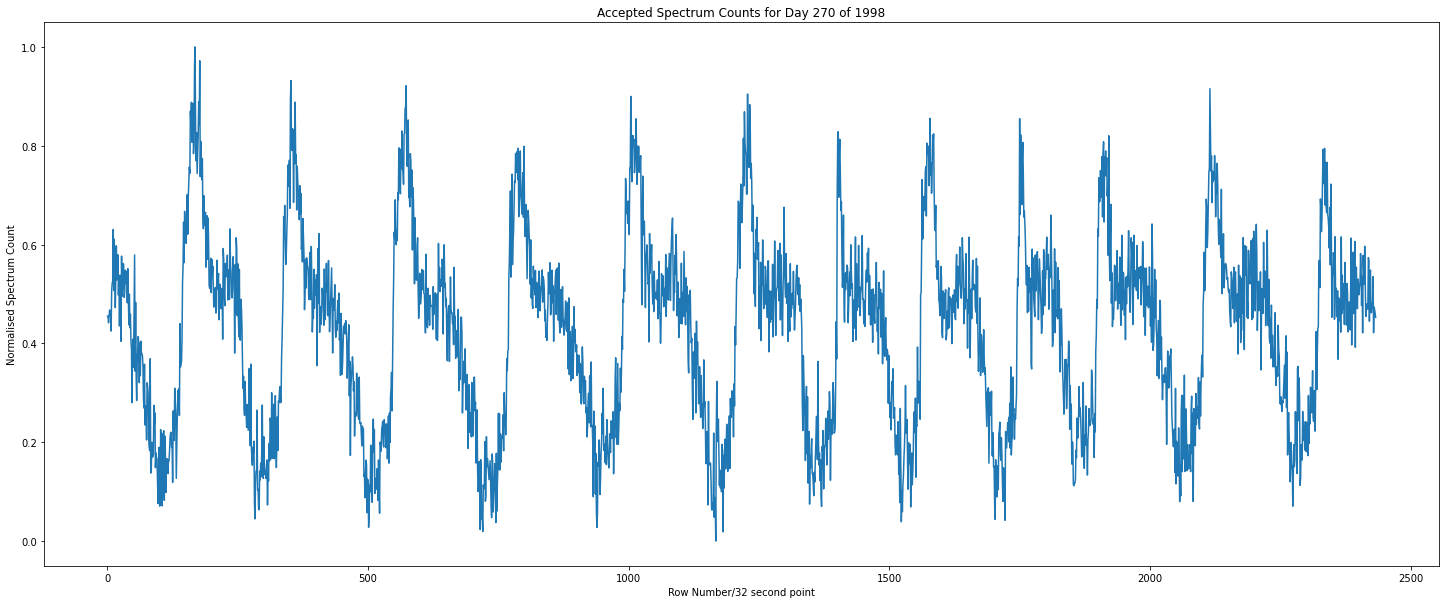

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalising the data for plotting.
scaler = MinMaxScaler()
np_data = np.array(data["sum_accepted_spectrum"])
np_data = np_data.reshape(-1,1)
scaled_data = scaler.fit_transform(np_data)
print(scaled_data)

print(min(data["sum_accepted_spectrum"]))
print(max(data["sum_accepted_spectrum"]))

plt.figure(figsize = (25, 10))
plt.plot(scaled_data)
plt.title("Accepted Spectrum Counts for Day 270 of 1998")
plt.ylabel("Normalised Spectrum Count")
plt.xlabel("Row Number/32 second point")

# Creating a Pandas Dataframe to store all GRS data

In [7]:
# Determining the .dat and .lbl files available locally.

import os

directory = './Task1'  # Replace with your directory path
files = os.listdir(directory)

dat_files = []
lbl_files = []
for file in files:
    if file.endswith('.dat'):
        dat_files.append(file)
    elif file.endswith('.lbl'):
        lbl_files.append(file)

In [ ]:
data = []

# Iterating through all .dat and .lbl files.
for i in dat_files:
    print(f"Working on file {i}")
    if i[:-4] + ".lbl" in lbl_files:
        filename = f"./Task1/{i[:-4]}.lbl"
        datafilename = f"./Task1/{i}"
    else:
        continue

    # Define the record format for the label file
    label_format = [
        ("PDS_VERSION_ID", "23s"),
        ("RECORD_TYPE", "23s"),
        ("RECORD_BYTES", "23s"),
        ("FILE_RECORDS", "23s"),
        ("^TABLE", "23s"),
        ("DATA_SET_NAME", "59s"),
        ("DATA_SET_ID", "33s"),
        ("PRODUCT_ID", "23s"),
        ("PRODUCT_TYPE", "23s"),
        ("PRODUCT_VERSION_ID", "23s"),
        ("SPACECRAFT_NAME", "23s"),
        ("INSTRUMENT_NAME", "23s"),
        ("TARGET_NAME", "23s"),
        ("START_TIME", "23s"),
        ("STOP_TIME", "23s"),
        ("SPACECRAFT_CLOCK_START_COUNT", "23s"),
        ("SPACECRAFT_CLOCK_STOP_COUNT", "23s"),
        ("PRODUCT_CREATION_TIME", "23s")
    ]

    # Define the record format for the data file
    data_format = [
        ("accepted_spectrum", "512f"),
        ("rejected_spectrum", "512f"),
        ("deadtime", "f"),
        ("overload", "f"),
        ("grs_temperature", "f"),
        ("earth_received_time", "f"),
        ("spacecraft_altitude", "f"),
        ("subspacecraft_latitude", "f"),
        ("subspacecraft_longitude", "f")
    ]

    # Open the data file for reading
    with open(filename, "r") as f:
        label = {}
        for line in f:
            # Ignoring all comments in the .lbl file.
            if line.strip() and not line.startswith("#"):
                # Splitting lines and reading values for corresponding labels
                parts = line.split("=", 1)
                if len(parts) == 2:
                    key = parts[0].strip()
                    value = parts[1].strip()
                    label[key] = value

    # Read the data file
    with open(datafilename, "rb") as f:
        for i in range(int(label["FILE_RECORDS"])):
            record = {}
            for field, format in data_format:
                bytes = f.read(struct.calcsize(format))
                value = struct.unpack(format, bytes)[0]
                # Separate condition for accepted and rejected spectrum as they 512 data items.
                if field == "accepted_spectrum" or field == "rejected_spectrum":
                    value = struct.unpack(format, bytes)
                record[field] = value
            data.append(record)

df = pd.DataFrame(data)
df.head()
df.info()
df.to_csv("./Task1/cumulative_grs_data.csv", index = False)

Working on file 1998_016_grs.dat
Working on file 1998_017_grs.dat
Working on file 1998_018_grs.dat
Working on file 1998_019_grs.dat
Working on file 1998_020_grs.dat
Working on file 1998_021_grs.dat
Working on file 1998_022_grs.dat
Working on file 1998_023_grs.dat
Working on file 1998_024_grs.dat
Working on file 1998_025_grs.dat
Working on file 1998_026_grs.dat
Working on file 1998_027_grs.dat
Working on file 1998_028_grs.dat
Working on file 1998_029_grs.dat
Working on file 1998_030_grs.dat
Working on file 1998_031_grs.dat
Working on file 1998_032_grs.dat
Working on file 1998_033_grs.dat
Working on file 1998_034_grs.dat
Working on file 1998_035_grs.dat
Working on file 1998_036_grs.dat
Working on file 1998_037_grs.dat
Working on file 1998_038_grs.dat
Working on file 1998_039_grs.dat
Working on file 1998_040_grs.dat
Working on file 1998_041_grs.dat
Working on file 1998_042_grs.dat
Working on file 1998_043_grs.dat
Working on file 1998_044_grs.dat
Working on file 1998_045_grs.dat
Working on

Working on file 1998_295_grs.dat
Working on file 1998_296_grs.dat
Working on file 1998_297_grs.dat
Working on file 1998_298_grs.dat
Working on file 1998_299_grs.dat
Working on file 1998_300_grs.dat
Working on file 1998_302_grs.dat
Working on file 1998_303_grs.dat
Working on file 1998_304_grs.dat
Working on file 1998_305_grs.dat
Working on file 1998_306_grs.dat
Working on file 1998_307_grs.dat
Working on file 1998_308_grs.dat
Working on file 1998_309_grs.dat
Working on file 1998_313_grs.dat
Working on file 1998_314_grs.dat
Working on file 1998_315_grs.dat
Working on file 1998_316_grs.dat
Working on file 1998_317_grs.dat
Working on file 1998_318_grs.dat
Working on file 1998_323_grs.dat
Working on file 1998_324_grs.dat
Working on file 1998_325_grs.dat
Working on file 1998_326_grs.dat
Working on file 1998_327_grs.dat
Working on file 1998_328_grs.dat
Working on file 1998_329_grs.dat
Working on file 1998_330_grs.dat
Working on file 1998_331_grs.dat
Working on file 1998_332_grs.dat
Working on

# Task Complete

The specified .dat files have been retrieved, and have been parsed using the respective .lbl files. Furthermore, a plot illustrating the **accepted_spectrum_count** for **Day 270** of **1998** has been plotted, which demonstrates the count of spectrum count for every 32 seconds

*Kindly note that certain outputs while fetching the data have been cleared. Only necessary outputs have been displayed*